<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [31]:
# insert code here

## Import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  3.6.0
Tensorflow version:  2.17.0


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [32]:
# insert code here
diabetes = load_diabetes()

### Prepare input data

In [33]:
# insert code here
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [34]:
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

print(X.head())
print('-' * 20)
print(y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
--------------------
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [36]:
n_cols = X.shape[1]
n_cols

10

### Split the data (training/test)

In [37]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Create the model's architecture

In [38]:
# insert code here
model = Sequential()
model.add(Input(shape=(n_cols,)))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))


In [39]:
# # Initialize the Sequential model
# model = Sequential()

# # Define the input layer using Input(shape=(n_cols,))
# model.add(Input(shape=(n_cols,)))

# # Add the first hidden layer
# model.add(Dense(15, activation='relu'))

# # Add the second hidden layer
# model.add(Dense(5, activation='relu'))

# # Add the output layer
# model.add(Dense(1, activation='linear'))  # For regression, use linear activation

In [40]:
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [41]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['mean_squared_error'])

### Fit the training data

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# %%time
X_train_scaled, y_train = shuffle(X_train_scaled, y_train)


In [44]:
# Fit the model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

### Create y_test_pred

In [45]:
y_test_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


### Evaluate the model

In [46]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 315)
print(f'\nTest loss: {score[0]:.6f}, Test accuracy: {score[1]:.6f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7016.7764 - mean_squared_error: 7016.7764

Test loss: 7016.776367, Test accuracy: 7016.776367


In [47]:
pd.DataFrame(y_test_pred).describe()

,0
count,133.000000
mean,103.386368
std,3.951307
min,94.833664
25%,100.607475
50%,103.786606
75%,106.591484
max,113.685966


### Visualization of cost

In [48]:
# insert code here
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

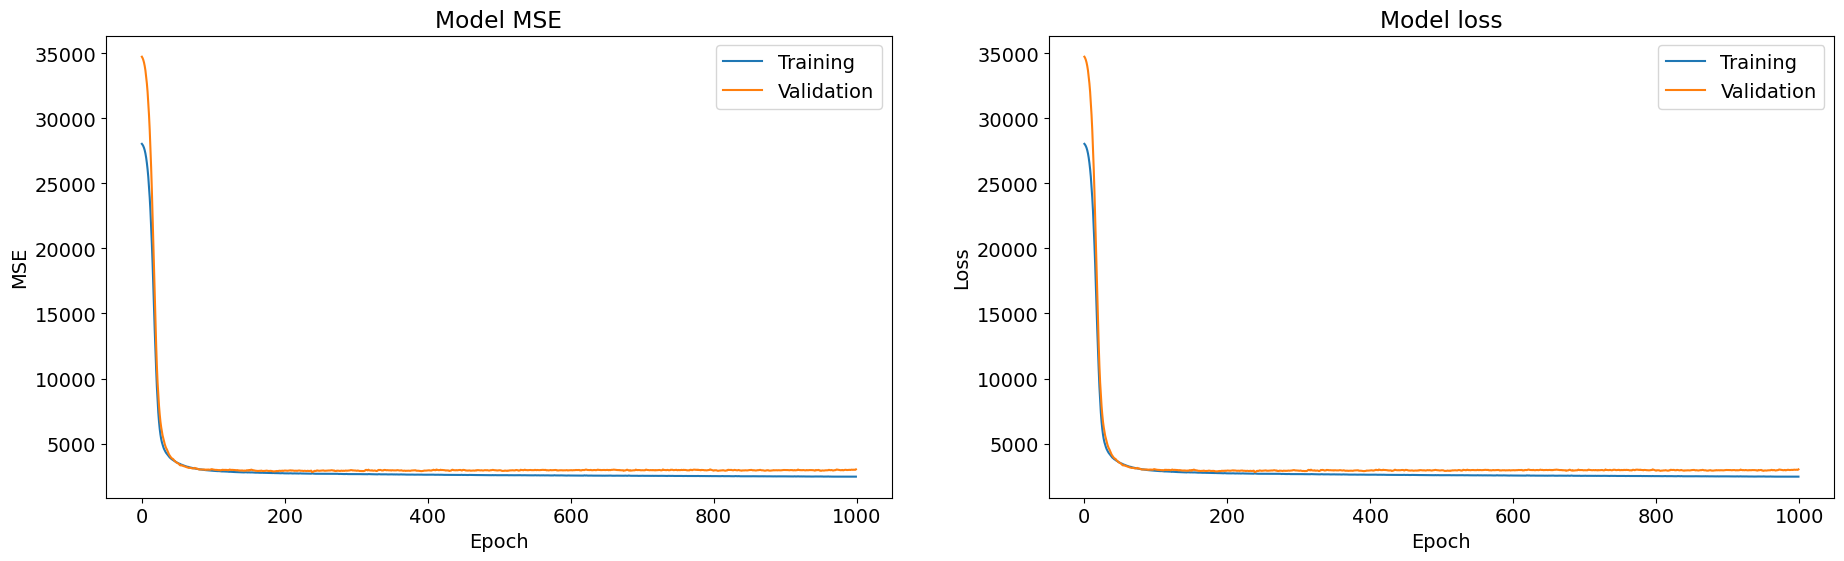

In [49]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mean_squared_error'], label = 'Training')
ax[0].plot(history.history['val_mean_squared_error'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualization of residuals

In [50]:
r2 = r2_score(y_test, y_test_pred)
n, p = X_test.shape 
adjusted_r2 = 1- (1 - r2) * ((n - 1) / (n - p  - 1))
print(f'{r2:.4}, {adjusted_r2:.4}')

-0.2998, -0.4064


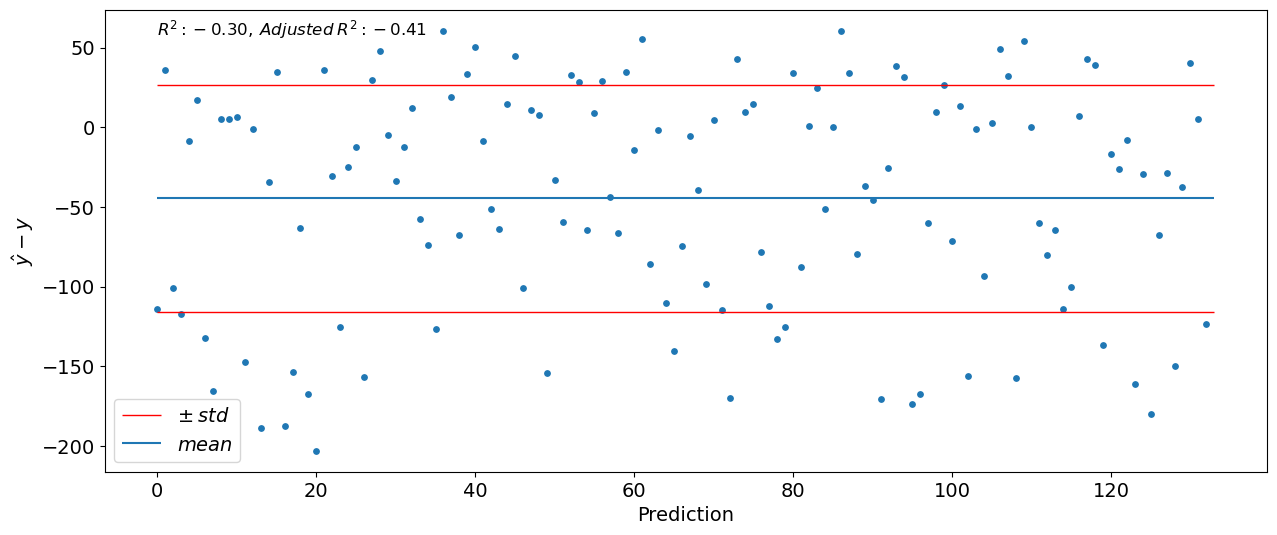

In [51]:
differences = y_test_pred.flatten() - y_test
d_mean = differences.mean()
d_std = differences.std()
n_pred = len(y_test_pred)

plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), differences, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, differences.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



